In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras import Sequential
#import matplotlib as plt

In [0]:
data = []
labels = []
classes = 43

In [0]:
!unzip '/content/drive/My Drive/Data_Sets/traffic-sign.zip'

In [0]:
import os
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    #print("done-1")
    for a in images:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            #print('done')

In [0]:
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [0]:
#one hot encoding for the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43) 

In [0]:
#model
#from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras import Sequential
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_test, y_test))
model.save("traffic_sign_detection.h5")

Epoch 1/100
981/981 [==============================] - 6s 6ms/step - loss: 0.2581 - accuracy: 0.9280 - val_loss: 0.0623 - val_accuracy: 0.9807
Epoch 2/100
981/981 [==============================] - 6s 6ms/step - loss: 0.2659 - accuracy: 0.9285 - val_loss: 0.0822 - val_accuracy: 0.9769
Epoch 3/100
981/981 [==============================] - 5s 5ms/step - loss: 0.2694 - accuracy: 0.9278 - val_loss: 0.0566 - val_accuracy: 0.9833
Epoch 4/100
981/981 [==============================] - 6s 6ms/step - loss: 0.2438 - accuracy: 0.9333 - val_loss: 0.0873 - val_accuracy: 0.9767
Epoch 5/100
981/981 [==============================] - 5s 6ms/step - loss: 0.2484 - accuracy: 0.9334 - val_loss: 0.0751 - val_accuracy: 0.9799
Epoch 6/100
981/981 [==============================] - 5s 5ms/step - loss: 0.2445 - accuracy: 0.9343 - val_loss: 0.0726 - val_accuracy: 0.9788
Epoch 7/100
981/981 [==============================] - 5s 6ms/step - loss: 0.2528 - accuracy: 0.9324 - val_loss: 0.0632 - val_accuracy: 0.9820

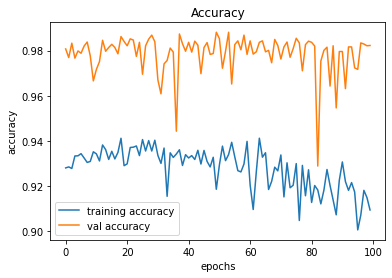

In [27]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

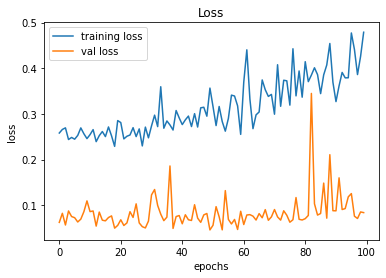

In [26]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [0]:
data = []

In [0]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [0]:
X_test=np.array(data)

In [0]:
pred = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [39]:
print(accuracy_score(labels, pred))

0.9445764053840063
